# LESSON 6: SOFTMAX REGRESSION
<table><tr>
<td> <img src="../images/linear_logistic_regression_logo.jpeg" width="600px"/> </td>
</tr></table>

*This lecture was refered by [machinelearningcoban.com](https://machinelearningcoban.com/2017/02/17/softmax/)*

## 1. Softmax regression introduction
Using simple logistic regression, we only solve classification problem with only 1 class.

To solve multiple classes classification problem by using logistic regression, we have to build multiple logistic regression models. This model is called ***one-vs-rest***.

<img src="../images/softmax_regression_one_vs_rest.png" width="600px"/>

$a_i$ with i = 1, 2, 3 ... C are almost independent and their sum can be larger or smaller than 1.

<img src="../images/softmax_regression_softmax_net.png" width="700px"/>

<img src="../images/softmax_regression_example.png" width="700px"/>

Because we have to calculate $e^{z_i}$, if $z_i$ is large, $e^{z_i}$ will be very large and it causes value out of range error. We need to build a stable version of softmax.

<center>
    \[
    softmax(z^i)
    = \frac{e^{z_i}}{\sum_j^C e^{z_j}}
    = \frac{e^{-max_j(z_j)} * e^{z_i}}{e^{-max_j(z_j)} * \sum_j^C e^{z_j}}
    = \frac{e^{z_i - max_j(z_j)}}{\sum_j^C e^{z_j - max_j(z_j)}}
    \]
</center>

## 2. Loss function and Optimizer for Softmax regression
Instead of having only 2 classes like logistic regression, softmax regression has C classes and it need another form of cross entropy loss function.

Its name is ***CATEGORICAL CROSS ENTROPY***

<center>
    \[
    J(W; X, Y) = -\sum_{i=1}^N \sum_{j=1}^C y_{ji}\log(a_{ji})
    = -\sum_{i=1}^N \sum_{j=1}^C y_{ji}\log\frac{e^{{z}_i}}{\sum_{k=1}^C e^{{z}_k}}
    \]
</center>

For each sample from the dataset,
<center>
    \[
    J({W}; {x}_i, {y}_i)
    = -\sum_{j=1}^C y_{ji}\log\frac{e^{{z}_ji}}{\sum_{k=1}^C e^{{z}_ki}} \\
    = -\sum_{j=1}^C (y_{ji}{z}_ji - y_{ji}\log{\sum_{k=1}^C e^{{z}_ki}}) \\
    = -\sum_{j=1}^C y_{ji}{z}_ji + \sum_{j=1}^C y_{ji}\log{\sum_{k=1}^C e^{{z}_ki}} \\
    = -\sum_{j=1}^C y_{ji}{z}_ji + \log{\sum_{k=1}^C e^{{z}_ki}}
    \]
</center>

Note:
- $\sum_{j=1}^C y_{ji}=1$ because it's the sum of probability
- $\log{\sum_{k=1}^C e^{{z}_ki}}$ is independent with $j$ so we can remove $\sum_{j=1}^C$

To calculate derivative of $J$ with $W$, we can use the following fomular

<center>
    \[
    \frac{\partial J_i(W)}{\partial W} = [\frac{\partial J_i(W)}{\partial w_1}, \frac{\partial J_i(W)}{\partial w_2}, \dots, \frac{\partial J_i(W)}{\partial w_C}]
    \]
</center>

and gradient of each column can be calculated by

<center>
    \[
    \frac{\partial J_i(W)}{\partial w_j} 
    = -y_{ji}x_i + \frac{e^{z_ji} x_i}{\sum_{k=1}^C e^{z_ki}}
    = -y_{ji}x_i + a_{ji} x_i
    = x_i (a_{ji} - y_{ji})
    \]
</center>

Note:
- In the first equation, because we do derivative with $w_j$, all elements in $\sum_{k=1}^C e^{z_ki}$ are equal to 0 except $e^{z_ji}$
- $e_{ji} = a_{ji} - y_{ji}$ is the different between the prediction and the real value

Now, we have 

<center>
    \[
    \frac{\partial J_i(W)}{\partial W} = x_i[e_{1i}, e_{1i}, \dots, e_{ji}] = x_i e_i
    \]
</center>

and for the whole dataset

<center>
    \[
    \frac{\partial J(W)}{\partial W} = \sum_{i=1}^N x_i e_{i} = XE
    \]
</center>

Using SGD, we have fomular to update parameters

<center>
    \[
    W = W + \eta e_i x_i = W + \eta(a_{i} - y_{i})x_i
    \]
</center>

**To conclude, Logistic Regression is a special case of Softmax Regression!!!**

## 3. Implementation example

### 3.1. Prepare library and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df = iris_df.drop(columns=['sepal_length', 'sepal_width'])
df

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


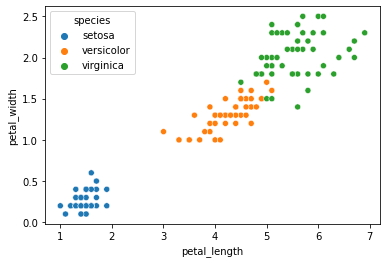

In [4]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.show()

In [5]:
df

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


In [6]:
def prepare_X_ones(X):
    x_1 = np.ones((1, X.shape[1]))
    print('x_0.shape', x_1.shape)

    X = np.concatenate((x_1, X), axis=0).T
    print('X.shape', X.shape)

    return X

In [7]:
X = df.iloc[:, :2].T
X.shape

(2, 150)

In [8]:
X = prepare_X_ones(X)
X.shape

x_0.shape (1, 150)
X.shape (150, 3)


(150, 3)

In [9]:
y = df.species
y.shape

(150,)

In [10]:
def one_hot_encode(y):
    y_one_hot = []
    y_index = []

    for label in y:
        if label == 'setosa':
            y_one_hot.append([1, 0, 0])
            y_index.append(0)
        elif label == 'versicolor':
            y_one_hot.append([0, 1, 0])
            y_index.append(1)
        elif label == 'virginica':
            y_one_hot.append([0, 0, 1])
            y_index.append(2)

    return np.array(y_one_hot), np.array(y_index)

In [11]:
y_one_hot, y_index = one_hot_encode(y)
y_one_hot.shape

(150, 3)

In [12]:
num_classes = y_one_hot.shape[1]
num_classes

3

### 3.2. Implement from scratch

In [13]:
class MySoftmaxRegression():
    
    def __init__(self, max_iter, num_classes):
        self.max_iter = max_iter
        self.num_classes = num_classes

    def __call__(self, X, y, lr):
        # Init randomly weights
        w_init = np.random.randn(X.shape[1], self.num_classes)
        w = [w_init]

        count = 0
        while count < self.max_iter:
            # Shuffle dataset to run SGD
            for i in np.random.permutation(X.shape[0]):
                x_i = X[i, :].reshape(1, X.shape[1])

                # Calculate logistic regression
                z_i = self.softmax(x_i.dot(w[-1]))

                
                # Calculate grad and update weights
                y_i = y[i].reshape(1, y[i].shape[0])
                w_new = w[-1] - lr * x_i.T.dot(z_i - y_i)

                count += 1

                # Stopping criteria
                if count % 20 == 0:                
                    if np.linalg.norm(w_new - w[-20]) < 1e-4:
                        self.w = w[-1]
                        return

                w.append(w_new)
        self.w = w[-1]

    @staticmethod
    def softmax(z):
        e_z = np.exp(z)
        A = e_z / np.expand_dims(np.sum(e_z, axis=1), 1)
        return A
    
    def predict(self, X):
        pred_proba = self.softmax(X.dot(self.w))
        pred = np.argmax(pred_proba, axis=1)
        return pred_proba, pred
    
    def display(self, X, y, w=None):

        reg_x = np.linspace(1, 7, 2)
        for index in range(self.num_classes):
            reg_y = \
            (- self.w[0][index] / self.w[2][index]) + \
            (- self.w[1][index] / self.w[2][index]) * reg_x
            plt.plot(reg_x, reg_y, 'y-')

        plt.plot(X[:50, 1], X[:50, 2], 'ro')
        plt.plot(X[50:100, 1], X[50:100, 2], 'go')
        plt.plot(X[100:, 1], X[100:, 2], 'bo')
        
        if w is not None:
            for index in range(self.num_classes):
                reg_y = \
                (- w[0][index] / w[2][index]) + \
                (- w[1][index] / w[2][index]) * reg_x
                plt.plot(reg_x, reg_y, 'k-')

        plt.xlabel('sepal_length')
        plt.ylabel('sepal_width')
        plt.xlim(0.5, 7.5)
        plt.ylim(0, 4)
        plt.show()

In [14]:
my_softmax_regression = MySoftmaxRegression(
    max_iter=10000,
    num_classes=num_classes
)

In [15]:
my_softmax_regression(
    X=X,
    y=y_one_hot,
    lr=0.01
)

In [16]:
my_softmax_regression.w

array([[ 4.6171989 , -0.65906317, -4.42703628],
       [-1.9618402 ,  0.15962902, -0.18807667],
       [-0.33678468, -0.5938621 ,  2.63897931]])

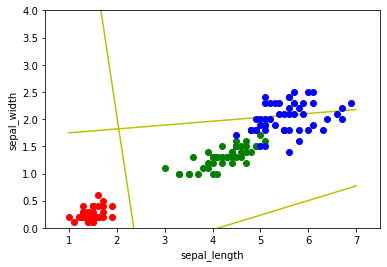

In [17]:
my_softmax_regression.display(X, y)

In [18]:
my_y_pred_proba, my_y_pred = my_softmax_regression.predict(X)
my_y_pred.shape

(150,)

In [19]:
my_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 3.3. Use `sklearn`

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [21]:
sklearn_logistic_regression = LogisticRegression(fit_intercept=False)
sklearn_logistic_regression

LogisticRegression(fit_intercept=False)

In [22]:
sklearn_logistic_regression.fit(X, y)

LogisticRegression(fit_intercept=False)

In [23]:
sklearn_logistic_regression.coef_

array([[ 3.90357538, -0.81657218, -1.57536381],
       [-0.21589691,  0.50595812, -0.60411622],
       [-3.68767847,  0.31061406,  2.17948002]])

In [24]:
my_softmax_regression.w

array([[ 4.6171989 , -0.65906317, -4.42703628],
       [-1.9618402 ,  0.15962902, -0.18807667],
       [-0.33678468, -0.5938621 ,  2.63897931]])

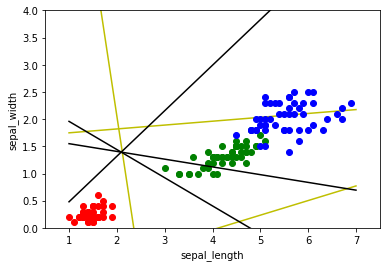

In [25]:
my_softmax_regression.display(X, y, sklearn_logistic_regression.coef_.T)

In [26]:
sklearn_y_pred = sklearn_logistic_regression.predict(X)
sklearn_y_pred.shape

(150,)

In [27]:
print(classification_report(sklearn_y_pred, y))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.92      0.92        50
   virginica       0.92      0.92      0.92        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [28]:
print(classification_report(my_y_pred, y_index))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.89      0.93        55
           2       0.88      0.98      0.93        45

    accuracy                           0.95       150
   macro avg       0.95      0.96      0.95       150
weighted avg       0.96      0.95      0.95       150



## 4. Homework